In [2]:
import pandas as pd
import re
import spacy
import string
import matplotlib.pyplot as plt
import seaborn as sns

nlp = spacy.load('en_core_web_sm')
%matplotlib inline

In [4]:
df = pd.read_csv('data/lyrics.csv')

In [5]:
def tokenize(raw_lyrics):
    
    lyrics_nopunct = re.sub(r'[^\w\s]', ' ', raw_lyrics)
    clean_lyrics = lyrics_nopunct.lower().replace('\n', ' ')
        
    return clean_lyrics

In [6]:
df['lyrics_tokenized'] = df['lyrics'].astype(str).apply(tokenize)
df.head()

,index,song,year,artist,genre,lyrics,lyrics_tokenized
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",oh baby how you doing you know i m gonna cut...
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",playin everything so easy it s like you seem...
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search for tenderness it isn t hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",oh oh oh i oh oh oh i verse 1 if i wrote a...
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",party the people the people the party it s po...


In [7]:
df['word_count'] = df['lyrics_tokenized'].apply(lambda x: len(x.split()))

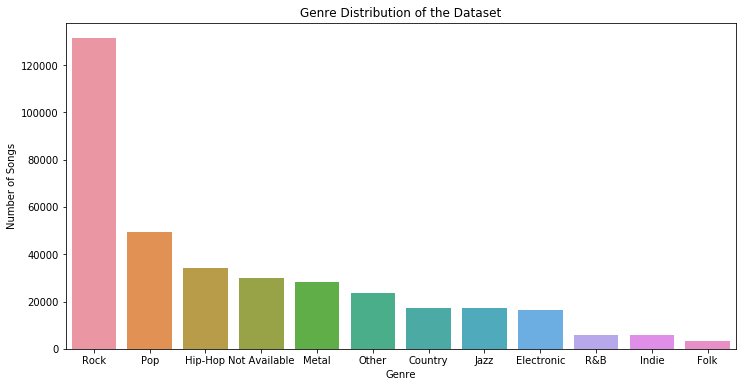

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(df['genre'], ax=ax, order=df['genre'].value_counts().index)
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
ax.set_title('Genre Distribution of the Dataset')
plt.savefig('genre_distribtution.png')

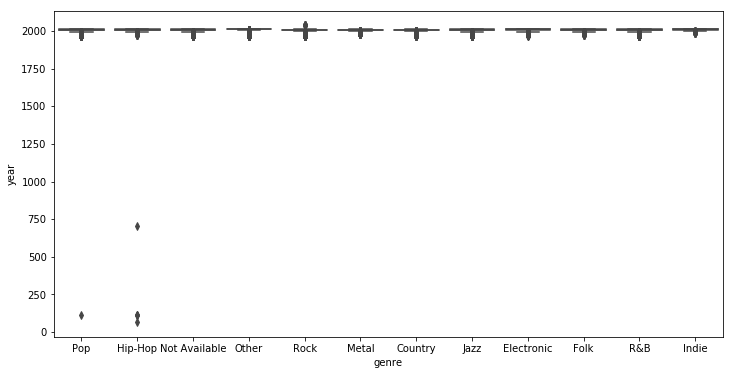

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='genre', y='year', data=df)

In [8]:
df = df.query("year > 1000")

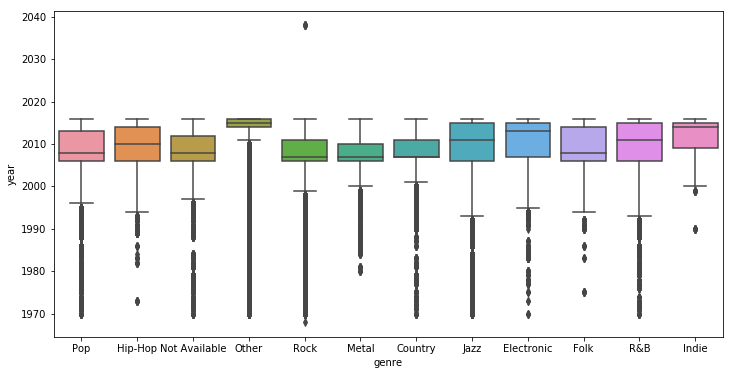

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='genre', y='year', data=df)

In [9]:
df = df.query("year < 2020")

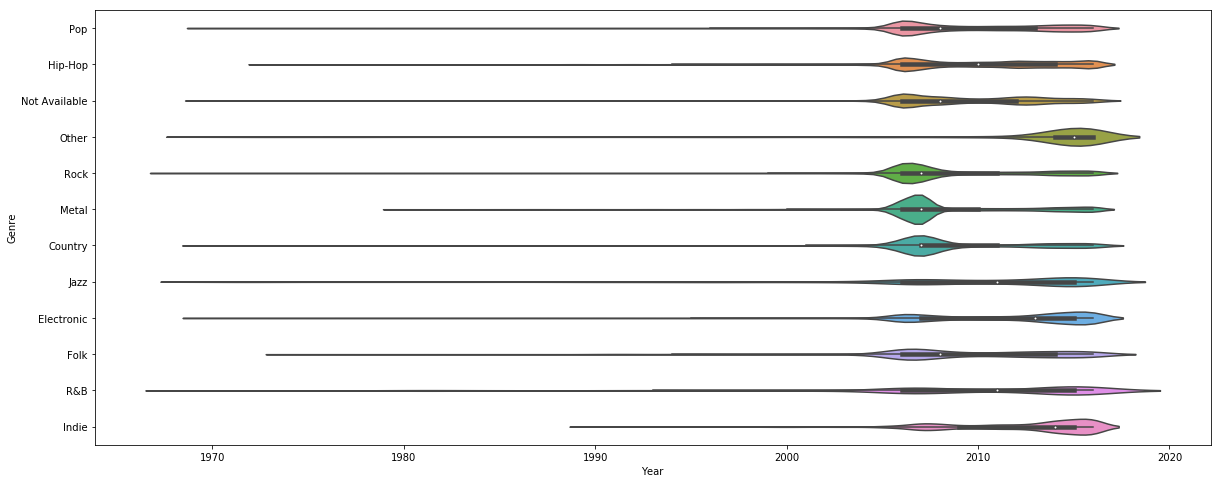

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
sns.violinplot(x='year', y='genre', data=df, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Genre')
plt.savefig('genre_year_distribution.png')

Text(0.5,1,'Distribution of Word Counts')

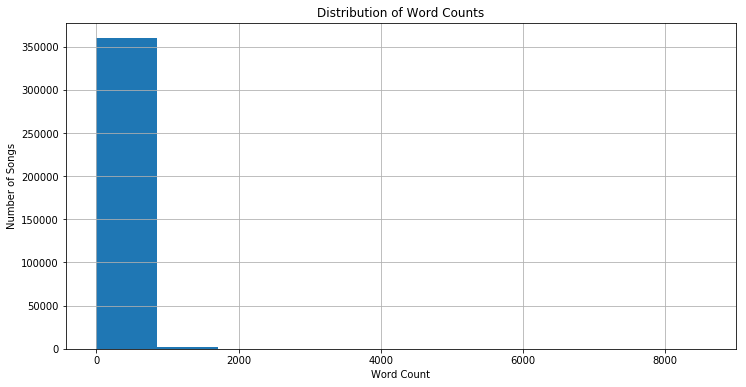

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
df['word_count'].hist()
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Songs')
ax.set_title('Distribution of Word Counts')

In [16]:
df = df.query("word_count > 20")

In [52]:
df.head()

,index,song,year,artist,genre,lyrics,lyrics_tokenized,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",oh baby how you doing you know i m gonna cut...,472
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",playin everything so easy it s like you seem...,268
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search for tenderness it isn t hard to ...,177
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",oh oh oh i oh oh oh i verse 1 if i wrote a...,541
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",party the people the people the party it s po...,338


In [55]:
df.isnull().sum()

index               0
song                1
year                0
artist              0
genre               0
lyrics              0
lyrics_tokenized    0
word_count          0
dtype: int64

In [54]:
df.drop('lyrics', axis=1).to_csv('data/lyrics_tokenized.csv', index=False)

# Favorite curses!

In [17]:
rap = df.query('genre == "Hip-Hop"')

In [36]:
curses = ['bitch', 'fuck', 'damn', 'nigga', 'shit']

In [37]:
def most_curses(df):
    """
    Input is df with lyrics string and artist
    Output is dataframe with columns:
        artist: the artist in question
        word_count: total word count per artist
        columns for each curse
    """
    
    lyrics_count = df.copy().groupby(['artist', 'genre'])['word_count'].sum()
    lyrics_full = df.copy().groupby(['artist', 'genre'])['lyrics_tokenized'].apply(lambda x: ' '.join(list(x)))
    
    curses_df = pd.concat([lyrics_full, lyrics_count], axis=1).reset_index()

    for curse in curses:
        curse_column = curses_df['lyrics_tokenized'].apply(lambda x: x.count(curse))
        curses_df[curse] = curse_column * 1.0 / curses_df['word_count']
    
    return curses_df.drop('lyrics_tokenized', axis=1)

In [38]:
rap_curses = most_curses(rap).sort_values('word_count', ascending=False)
rap_curses.head(20)

,artist,genre,word_count,bitch,fuck,damn,nigga,shit
866,eminem,Hip-Hop,423053,0.002704,0.007592,0.000813,0.001789,0.004338
483,chris-brown,Hip-Hop,279720,0.002456,0.002932,0.000804,0.003983,0.002059
13,2pac,Hip-Hop,255976,0.002774,0.008712,0.000555,0.012536,0.002903
451,chamillionaire,Hip-Hop,242494,0.000404,0.000524,0.000507,0.004058,0.000396
25,50-cent,Hip-Hop,218672,0.003855,0.006151,0.000686,0.014218,0.005982
1003,game,Hip-Hop,209091,0.003879,0.007930,0.000493,0.015606,0.004759
335,bone-thugs-n-harmony,Hip-Hop,202402,0.001833,0.006369,0.000613,0.016023,0.003182
802,drake,Hip-Hop,196772,0.002084,0.004955,0.000828,0.006358,0.004797
392,busta-rhymes,Hip-Hop,184712,0.003221,0.005544,0.000254,0.014791,0.007466
754,dmx,Hip-Hop,170898,0.004178,0.008871,0.000527,0.016642,0.006086


In [39]:
rap_curses_long = rap_curses.drop(['genre'], axis=1)\
    .melt(id_vars=['artist', 'word_count'], var_name='curse', value_name='rate')\
    .sort_values(['word_count', 'curse'], ascending=[False, True])
rap_curses_long.head(10)

,artist,word_count,curse,rate
0,eminem,423053,bitch,0.002704
2180,eminem,423053,damn,0.000813
1090,eminem,423053,fuck,0.007592
3270,eminem,423053,nigga,0.001789
4360,eminem,423053,shit,0.004338
1,chris-brown,279720,bitch,0.002456
2181,chris-brown,279720,damn,0.000804
1091,chris-brown,279720,fuck,0.002932
3271,chris-brown,279720,nigga,0.003983
4361,chris-brown,279720,shit,0.002059


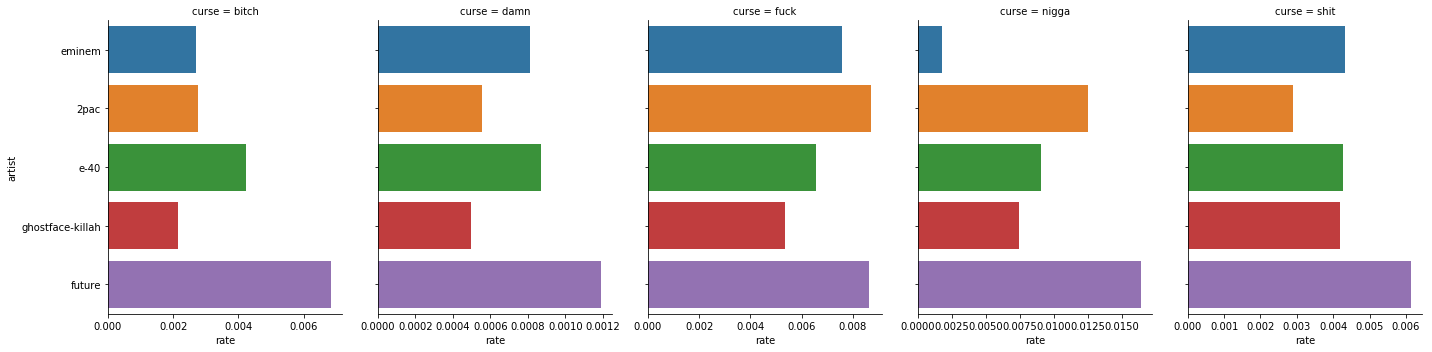

In [51]:
rappers = ['eminem', '2pac', 'ghostface-killah', 'future', 'e-40']
rapper_df = rap_curses_long.loc[rap_curses_long.artist.isin(rappers),:]

sns.factorplot('rate', 'artist', col='curse', data=rapper_df, kind='bar',sharex=False, size=5, aspect=0.8)
plt.savefig('rappers_cursing.png')